In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import gluonbook as gb
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd 
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
from time import time
from matplotlib.pyplot import savefig

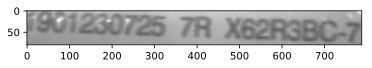

In [2]:
gb.set_figsize()
img = image.imread('/home/cad488/recognitioned_images_new/110032.jpg')
gb.plt.imshow(img.asnumpy())

In [3]:
# 本函数已保存在 gluonbook 包中方便以后使用。
def show_images(imgs, num_rows, num_cols, scale=2):                                                                              
    figsize = (12, 12)
    _, axes = gb.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)
    savefig("1.jpg")

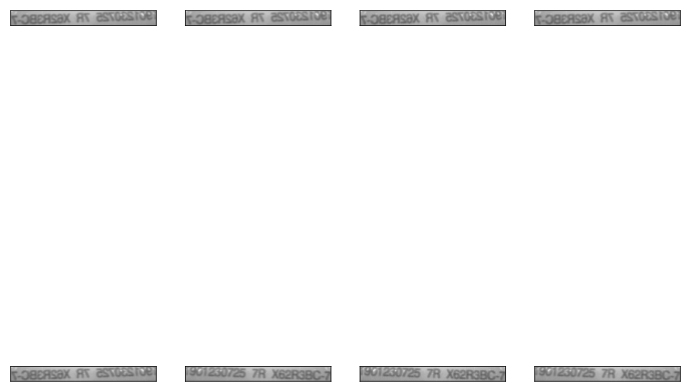

In [5]:
apply(img, gdata.vision.transforms.RandomFlipLeftRight())

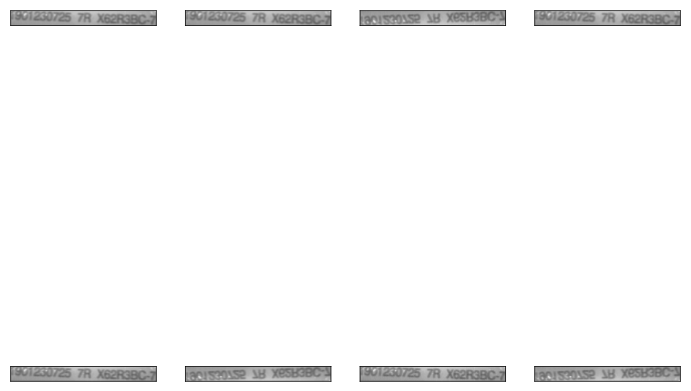

In [6]:
apply(img, gdata.vision.transforms.RandomFlipTopBottom())

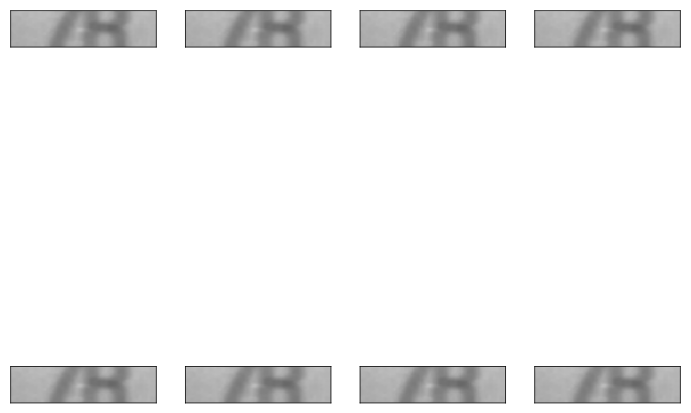

In [7]:
shape_aug = gdata.vision.transforms.RandomResizedCrop(
    (128, 32), scale=(0.2, 1), ratio=(0.5, 2))
apply(img, shape_aug)